In [1]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords


In [2]:
df = pd.read_csv('wordle_dataset.csv')

In [3]:
df.head(30)

,Unnamed: 0,word,meaning1,meaning2,meaning3,meaning4,meaning5
0,0,aachen,a city in western germany near the dutch and b...,formerly it was charlemagnes northern capital,aixlachapelle,aachen,aken
1,1,aardvark,nocturnal burrowing mammal of the grasslands o...,sole extant representative of the order tubuli...,anteater,ant bear,orycteropus afer
2,2,aaron,united states professional baseball player who...,old testament elder brother of moses and first...,henry louis aaron,aaron,hank aaron
3,3,aas,an associate degree in applied science,a dry form of lava resembling clinkers an inte...,associate in arts,aa,associate in applied science alcoholics anonym...
4,4,abaca,a kind of hemp obtained from the abaca plant i...,philippine banana tree having leafstalks that ...,manila hemp,manilla hemp,musa textilis
5,5,abandon,the trait of lacking restraint or control,reckless freedom from inhibition or worry a fe...,give up,desert,forsake unconstraint vacate empty desolate wan...
6,6,abandoned,forsake leave behind,give up with the intent of never claiming agai...,uninhabited,give up,desert forsake uninhibited vacate empty dereli...
7,7,abandonment,the act of giving something up,withdrawing support or help despite allegiance...,desertion,defection,forsaking
8,8,abase,cause to feel shame,hurt the pride of,humble,mortify,chagrin humiliate
9,9,abasement,a low or downcast state,hlmenchken depriving one of selfesteem,degradation,abjection,humiliation


In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['meaning1'] = df['meaning1'].apply(lambda text: ' '.join(word for word in text.split() if word not in stop_words))


[nltk_data] Downloading package stopwords to C:\Users\Rhea
[nltk_data]     Pandita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
sentences = [meaning.split() for meaning in df['meaning1']]

In [6]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

In [7]:
top_keywords = model.wv.index_to_key[:10]

In [8]:
print("Top keywords:")
for keyword in top_keywords:
    print(keyword)

Top keywords:
something
act
person
make
one
someone
state
especially
used
united


In [9]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [10]:
word1 = 'game'
word2 = 'play'
word3 = 'colour'

In [11]:
vec1 = model.wv[word1]
vec2 = model.wv[word2]
vec3 = model.wv[word3]

In [12]:
similarity_12 = cosine_similarity([vec1], [vec2])[0][0]
similarity_13 = cosine_similarity([vec1], [vec3])[0][0]

print(f"Cosine similarity between '{word1}' and '{word2}': {similarity_12:.4f}")
print(f"Cosine similarity between '{word1}' and '{word3}': {similarity_13:.4f}")

Cosine similarity between 'game' and 'play': 0.9977
Cosine similarity between 'game' and 'colour': 0.9868


In [13]:
word_to_find = 'reduce'
word_vector = model.wv[word_to_find]

In [14]:
similar_words = model.wv.most_similar(positive=[word_vector], topn=10)


In [15]:
print(f"Keywords related to '{word_to_find}':")
for word, similarity in similar_words:
    print(f"{word} (Cosine similarity: {similarity:.4f})")

Keywords related to 'reduce':
reduce (Cosine similarity: 1.0000)
result (Cosine similarity: 0.9981)
objects (Cosine similarity: 0.9980)
building (Cosine similarity: 0.9979)
easily (Cosine similarity: 0.9979)
influence (Cosine similarity: 0.9979)
attack (Cosine similarity: 0.9978)
sex (Cosine similarity: 0.9978)
uses (Cosine similarity: 0.9978)
held (Cosine similarity: 0.9978)


In [16]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Rhea
[nltk_data]     Pandita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rhea
[nltk_data]     Pandita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Define stopwords
stop_words = set(stopwords.words('english'))

In [19]:
# Load WordNet dataset
df2 = pd.read_csv('wordle_dataset.csv')

In [20]:
df2.head()

,Unnamed: 0,word,meaning1,meaning2,meaning3,meaning4,meaning5
0,0,aachen,a city in western germany near the dutch and b...,formerly it was charlemagnes northern capital,aixlachapelle,aachen,aken
1,1,aardvark,nocturnal burrowing mammal of the grasslands o...,sole extant representative of the order tubuli...,anteater,ant bear,orycteropus afer
2,2,aaron,united states professional baseball player who...,old testament elder brother of moses and first...,henry louis aaron,aaron,hank aaron
3,3,aas,an associate degree in applied science,a dry form of lava resembling clinkers an inte...,associate in arts,aa,associate in applied science alcoholics anonym...
4,4,abaca,a kind of hemp obtained from the abaca plant i...,philippine banana tree having leafstalks that ...,manila hemp,manilla hemp,musa textilis


In [21]:
sentences = []
for meaning in df2['meaning1']:
    tokens = word_tokenize(meaning)
    preprocessed_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    sentences.append(preprocessed_tokens)

In [22]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

In [23]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [24]:
def extract_keywords(word, n=5):
    # Check if the word is present in the dataset
    if word in df2['word'].values:
        # Retrieve the meaning of the given word
        meaning = df.loc[df2['word'] == word, 'meaning1'].values[0]
        # Tokenize, preprocess, and filter stopwords for the meaning
        meaning_tokens = word_tokenize(meaning)
        preprocessed_meaning_tokens = [word.lower() for word in meaning_tokens if word.isalnum() and word.lower() not in stop_words]
        # Initialize a list to store word vectors
        word_vectors = []
        # Retrieve word vectors for each word in the preprocessed meaning text
        for token in preprocessed_meaning_tokens:
            if token in model.wv.key_to_index:
                word_vectors.append(model.wv[token])
            else:
                print(f"Token '{token}' not present in the Word2Vec model vocabulary.")
        # Retrieve the word vector for the given word
        given_word_vector = model.wv[word]
        # Calculate cosine similarity between each word vector and the given word vector
        similarities = [model.wv.similarity(token, given_word_vector) for token in preprocessed_meaning_tokens]
        # Sort the tokens based on their similarity scores
        sorted_tokens = [token for _, token in sorted(zip(similarities, preprocessed_meaning_tokens), reverse=True)]
        # Return the top N tokens as keywords
        return sorted_tokens[:n]
    else:
        print(f"'{word}' not found in the dataset.")
        return []


In [25]:
# Example usage
word_to_find = 'abduct'
top_keywords = extract_keywords(word_to_find)
print(f"Top keywords related to '{word_to_find}': {top_keywords}")

KeyError: "Key '-0.0031369931530207396' not present"

[('extract a ransom', 0.015380821171891606), ('undisclosed location', 0.02570861714399338), ('order to extract', 0.02570861714399338), ('ransom', 0.09568045026443411), ('undisclosed', 0.15831692877998726), ('location', 0.15831692877998726), ('order', 0.15831692877998726), ('extract', 0.15831692877998726)]


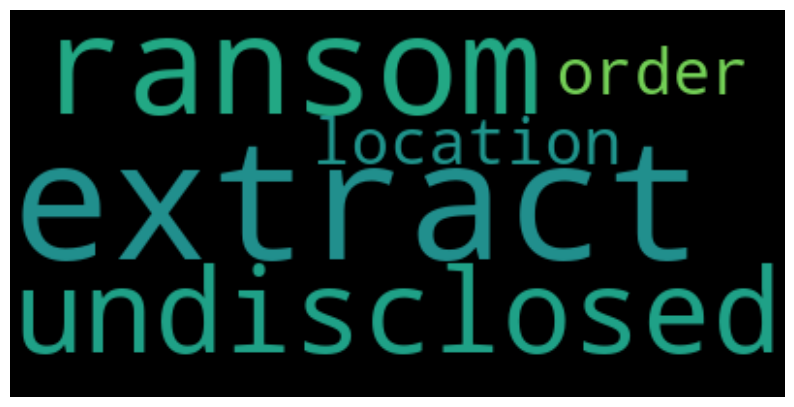

In [34]:
# Importing libraries 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import yake 

# Initializing the YAKE instance 
yake_kw = yake.KeywordExtractor() 

# Input text 
input_text = df2.loc[df2['word'] == 'abduct', 'meaning1'].values[0]

# Extracting keywords 
KeyWords = yake_kw.extract_keywords(input_text) 

# Displaying the keywords 
print(KeyWords) 

# Extracting keywords 
keywords = [kw for kw, _ in KeyWords] 

# Generate WordCloud 
wordcloud = WordCloud().generate(' '.join(keywords)) 
#print(wordcloud)

# Display the WordCloud 
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()


In [27]:
import gensim.downloader

In [29]:
model = gensim.downloader.load('word2vec-google-news-300') 

[==================================================] 100.0% 1662.8/1662.8MB downloaded


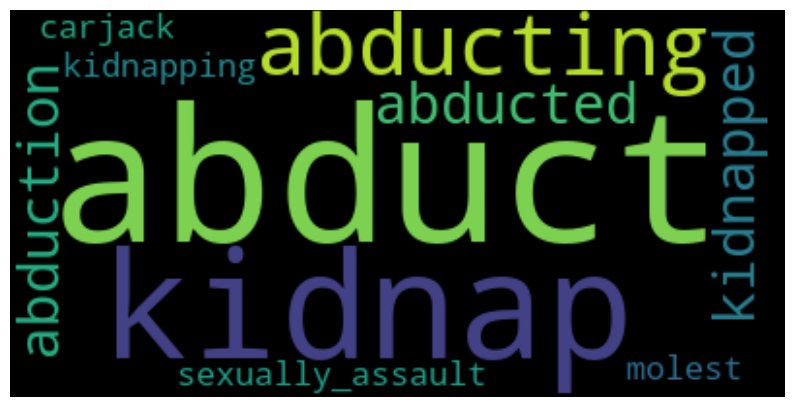

In [35]:
# Importing libraries
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# Initializing the Word2Vec model
#model = Word2Vec.load('your_word2vec_model_path')

# Input text
input_word = 'abduct'
input_text = df2.loc[df2['word'] == input_word, 'meaning1'].values[0]

# Tokenize input text
input_tokens = word_tokenize(input_text.lower())

# Get the word vector for the input word
if input_word in model:
    input_word_vector = model[input_word]
else:
    print(f"Word '{input_word}' not present in the Word2Vec model vocabulary.")
    exit()

# Extracting keywords based on similarity with input word vector
similar_words = model.most_similar(positive=[input_word_vector], topn=10)
keywords = [word for word, _ in similar_words]

# Generate WordCloud
wordcloud = WordCloud().generate(' '.join(keywords))
print(wordcloud)

# Display the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [33]:
print(wordcloud)

In [38]:
import yake 
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# Load Word2Vec model
#model = Word2Vec.load('your_word2vec_model_path')

# Initialize YAKE instance 
yake_kw = yake.KeywordExtractor()

# Input text 
input_text = df2.loc[df2['word'] == 'abduct', 'meaning1'].values[0]

# Tokenize input text
input_tokens = word_tokenize(input_text.lower())

# Obtain word embeddings for each token
word_embeddings = []
for token in input_tokens:
    if token in model:
        word_embeddings.append(model[token])
    else:
        print(f"Token '{token}' not present in the Word2Vec model vocabulary.")

# Convert word embeddings to string representation
word_embeddings_str = [' '.join(map(str, emb)) for emb in word_embeddings]

# Join the embeddings as input text for YAKE
input_text_emb = ' '.join(word_embeddings_str)

# Extract keywords using YAKE
KeyWords = yake_kw.extract_keywords(input_text_emb)

# Display the keywords
print(KeyWords)


Token 'to' not present in the Word2Vec model vocabulary.
Token 'and' not present in the Word2Vec model vocabulary.
Token 'to' not present in the Word2Vec model vocabulary.
Token 'a' not present in the Word2Vec model vocabulary.
[]


In [39]:
import yake
from transformers import BertTokenizer, BertModel
import torch

# Initialize YAKE instance
yake_kw = yake.KeywordExtractor()

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Input text
input_text = df2.loc[df2['word'] == 'abduct', 'meaning1'].values[0]

# Tokenize input text and convert to IDs
input_tokens = tokenizer.tokenize(input_text)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)

# Convert input IDs to PyTorch tensor
input_ids_tensor = torch.tensor([input_ids])

# Obtain BERT embeddings
with torch.no_grad():
    outputs = model(input_ids_tensor)
    embeddings = outputs[0]

# Convert BERT embeddings to string representation
embeddings_str = [' '.join(map(str, emb.tolist())) for emb in embeddings[0]]

# Join the embeddings as input text for YAKE
input_text_emb = ' '.join(embeddings_str)

# Extract keywords using YAKE
keywords = yake_kw.extract_keywords(input_text_emb)

# Display the keywords
print(keywords)


[]


In [41]:
embeddings_str

['0.0646638348698616 -0.4672723710536957 0.11147519946098328 0.7104235887527466 0.39031916856765747 -0.009923464618623257 -0.7566986083984375 0.8046150803565979 -0.5705078840255737 -0.4293193519115448 -0.04097349941730499 0.026048628613352776 -0.31623539328575134 -0.3525824248790741 0.11776133626699448 0.7164617776870728 0.2652376890182495 0.6378190517425537 -0.82132887840271 -0.5227847695350647 0.7352924346923828 0.22226670384407043 0.361970990896225 0.07940550148487091 -0.17970308661460876 -0.15085282921791077 0.5958540439605713 -0.2438465654850006 -0.7608458399772644 -0.3442161977291107 0.15245726704597473 -0.3485395908355713 0.0731988325715065 0.3482159376144409 -0.25757652521133423 -0.006543152034282684 -0.09674981236457825 -0.2974697947502136 -0.08127044886350632 -0.0659988671541214 -0.19951431453227997 -0.3019445240497589 -0.33802375197410583 -0.11883863061666489 -0.5290412902832031 0.007258731871843338 -1.6088342666625977 -0.26263582706451416 0.29108959436416626 -0.462327063083

In [42]:
from keyphrase_vectorizers import KeyphraseCountVectorizer

     ------------------------------------ 343.3/343.3 kB 266.4 kB/s eta 0:00:00
     ------------------------------------ 187.7/187.7 kB 567.0 kB/s eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 431.3 kB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
vectorizer = KeyphraseCountVectorizer()

In [ ]:
document_keyphrase_matrix = vectorizer.fit_transform(docs).toarray()
print(document_keyphrase_matrix)

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keybert: filename=keybert-0.8.4-py3-none-any.whl size=39262 sha256=fba3b7097f352fb543cf1b30bb8aeb73c057e07da15668cc96c63b2fb5da4445
  Stored in directory: c:\users\rhea pandita\appdata\local\pip\cache\wheels\81\e4\ee\453d310c148e394b6079fa58044fcf88f59d56b385de3ce41e
Successfully built keybert
